In [1]:
import pandas as pd

### Load results 

In [2]:
result_folder = '../scripts/output/CodeBERTa-small-v1/'
file_name = 'huggingface-CodeBERTa-small-v1_100_100.0_3.csv'

In [3]:
result_dataframe = pd.read_csv(result_folder + file_name, index_col=0)

In [4]:
result_dataframe.head()

,ast_element,occurences,jaccard,sorensen_dice,levenshtein,jaccard_avg,sorensen_dice_avg,levenshtein_avg
110,identifier,3067,"((0.967391304347826, 0.8014184397163121, 0, 0....","((0.9834254143646409, 0.889763779527559, 0, 0....","((0.9619565217391304, 0.7801418439716312, 0, 0...","(0.828, 0.753, 0.75)","(0.874, 0.815, 0.818)","(0.812, 0.747, 0.739)"
21,"""",950,"((1.0, 1.0, 1.0, 1.0, 0.6052631578947368, 1.0,...","((1.0, 1.0, 1.0, 1.0, 0.7540983606557377, 1.0,...","((1.0, 1.0, 1.0, 1.0, 0.5986842105263157, 1.0,...","(0.985, 0.898, 0.69)","(0.99, 0.926, 0.774)","(0.986, 0.897, 0.689)"
151,.,746,"((1.0, 1.0, 1.0, 0.967032967032967, 1.0, 1.0, ...","((1.0, 1.0, 1.0, 0.9832402234636871, 1.0, 1.0,...","((1.0, 1.0, 1.0, 0.967032967032967, 1.0, 1.0, ...","(0.996, 0.936, 0.911)","(0.998, 0.961, 0.943)","(0.996, 0.932, 0.91)"
62,),738,"((1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","((1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","((1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","(1.0, 0.939, 0.953)","(1.0, 0.963, 0.975)","(1.0, 0.937, 0.95)"
174,(,738,"((1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","((1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","((1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","(0.996, 0.908, 0.907)","(0.998, 0.946, 0.944)","(0.995, 0.905, 0.904)"


In [5]:
eval(result_dataframe['jaccard'][110])[0][0]

0.967391304347826

### Clean Table

In [6]:
result_dataframe = result_dataframe.drop('jaccard',axis=1)
result_dataframe = result_dataframe.drop('sorensen_dice',axis=1)
result_dataframe = result_dataframe.drop('levenshtein',axis=1)
result_dataframe.head()

,ast_element,occurences,jaccard_avg,sorensen_dice_avg,levenshtein_avg
110,identifier,3067,"(0.828, 0.753, 0.75)","(0.874, 0.815, 0.818)","(0.812, 0.747, 0.739)"
21,"""",950,"(0.985, 0.898, 0.69)","(0.99, 0.926, 0.774)","(0.986, 0.897, 0.689)"
151,.,746,"(0.996, 0.936, 0.911)","(0.998, 0.961, 0.943)","(0.996, 0.932, 0.91)"
62,),738,"(1.0, 0.939, 0.953)","(1.0, 0.963, 0.975)","(1.0, 0.937, 0.95)"
174,(,738,"(0.996, 0.908, 0.907)","(0.998, 0.946, 0.944)","(0.995, 0.905, 0.904)"


In [7]:
def get_k_prediction_values(dataframe, k):
    top_ocurrences_top_k_prediction = dataframe.copy()
    top_ocurrences_top_k_prediction['jaccard_avg'] = top_ocurrences_top_k_prediction['jaccard_avg'].map(lambda pr_avg: eval(pr_avg)[k-1])
    top_ocurrences_top_k_prediction['sorensen_dice_avg'] = top_ocurrences_top_k_prediction['sorensen_dice_avg'].map(lambda pr_avg: eval(pr_avg)[k-1])
    top_ocurrences_top_k_prediction['levenshtein_avg'] = top_ocurrences_top_k_prediction['levenshtein_avg'].map(lambda pr_avg: eval(pr_avg)[k-1])
    return top_ocurrences_top_k_prediction

### Top Ocurrences

<AxesSubplot: title={'center': 'Top 30 More Frequent LCEs & Top-1 Predictions'}, xlabel='ast_element'>

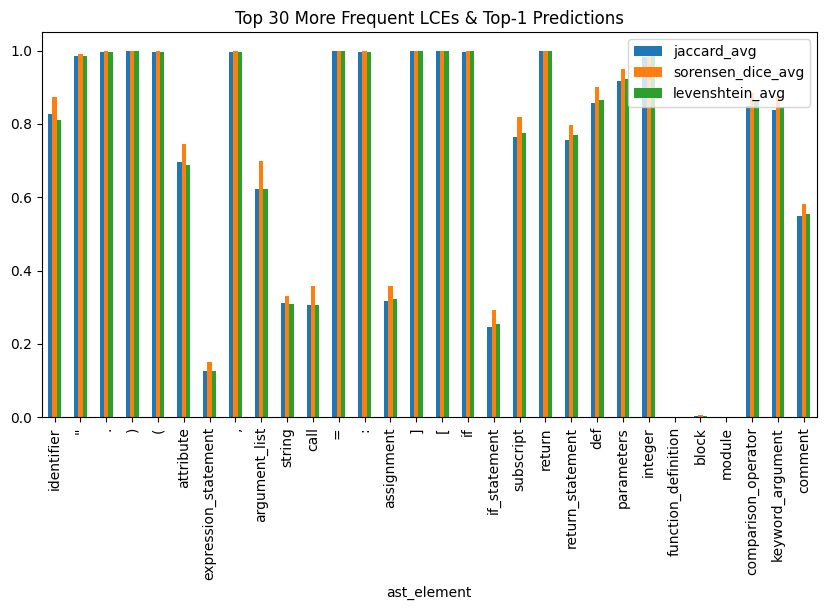

In [39]:
top_1_predictions = get_k_prediction_values(result_dataframe, 1)
top_1_predictions[:30].plot(x='ast_element', y=['jaccard_avg', 'sorensen_dice_avg', 'levenshtein_avg'], 
kind='bar', title='Top 30 More Frequent LCEs & Top-1 Predictions', figsize=(10,5))

<AxesSubplot: title={'center': 'Top 30 More Frequent LCEs & Top-2 Predictions'}, xlabel='ast_element'>

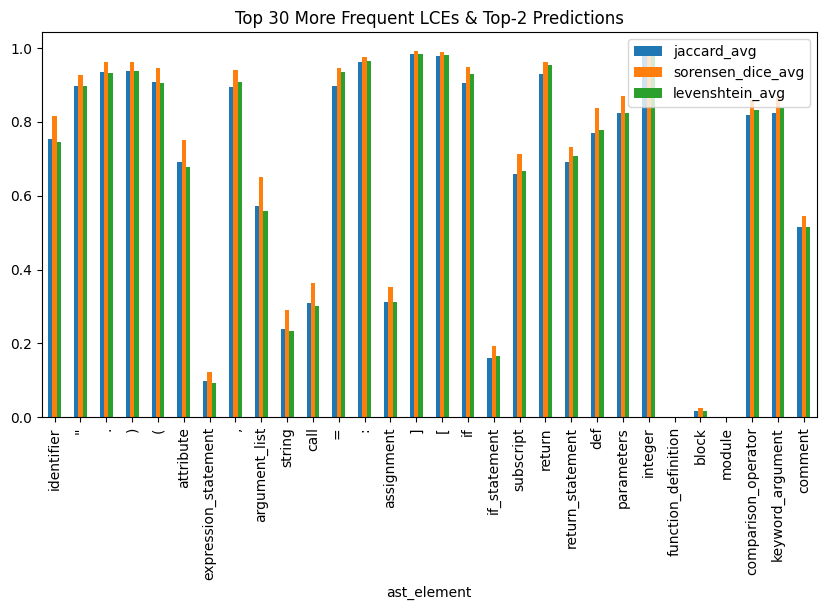

In [41]:
top_2_predictions = get_k_prediction_values(result_dataframe, 2)
top_2_predictions[:30].plot(x='ast_element', y=['jaccard_avg', 'sorensen_dice_avg', 'levenshtein_avg'], 
kind='bar', title='Top 30 More Frequent LCEs & Top-2 Predictions', figsize=(10,5))

<AxesSubplot: title={'center': 'Top 30 More Frequent LCEs & Top-3 Predictions'}, xlabel='ast_element'>

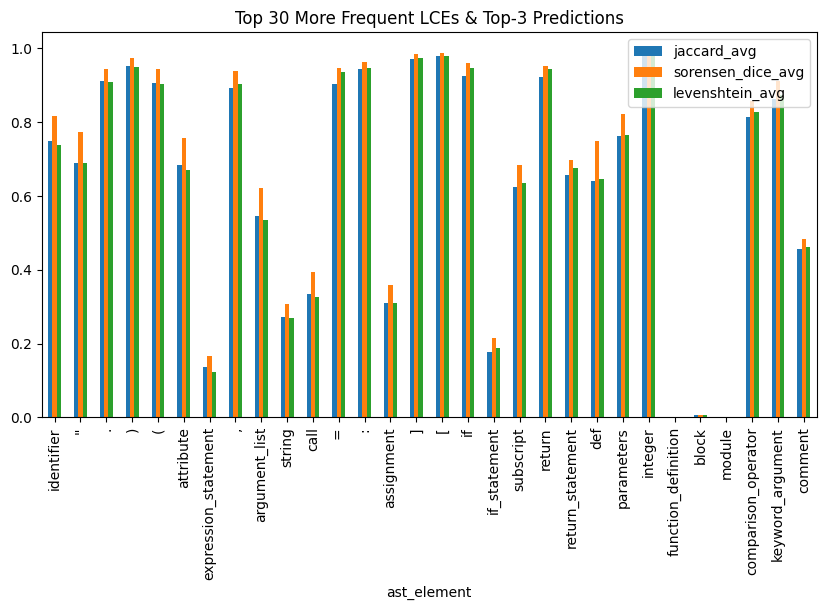

In [42]:
top_3_predictions = get_k_prediction_values(result_dataframe, 3)
top_3_predictions[:30].plot(x='ast_element', y=['jaccard_avg', 'sorensen_dice_avg', 'levenshtein_avg'], 
kind='bar', title='Top 30 More Frequent LCEs & Top-3 Predictions', figsize=(10,5))

### Most Similar Predictions

In [ ]:
top_1_predictions = get_k_prediction_values(result_dataframe, 1)
top_1_predictions[:30].plot(x='ast_element', y=['jaccard_avg', 'sorensen_dice_avg', 'levenshtein_avg'], 
kind='bar', title='Top 30 More Frequent LCEs & Top-1 Predictions', figsize=(10,5))